In [1]:
import numpy as np
import requests
import json
import scipy
import scipy.spatial
import plotly.express as px

### model

https://ollama.com/library/bge-m3:567m

https://ollama.com/library/mxbai-embed-large:335m

### Tricomoniasis

#### positive samples

https://en.wikipedia.org/wiki/Trichomoniasis

In [2]:
sample_wiki_en = """
Trichomoniasis (trich) is an infectious disease caused by the parasite Trichomonas vaginalis.[2] About 70% of affected people do not have symptoms when infected.[2] When symptoms occur, they typically begin 5 to 28 days after exposure.[1] Symptoms can include itching in the genital area, a bad smelling thin vaginal discharge, burning with urination, and pain with sex.[1][2] Having trichomoniasis increases the risk of getting HIV/AIDS.[1] It may also cause complications during pregnancy.[1]

Trichomoniasis is a sexually transmitted infection (STI) most often spread by vaginal, oral, or anal sex.[1] It can also spread through genital touching (manual sex).[1] People who are infected may spread the disease even when symptoms are not present.[2] Diagnosis is by finding the parasite in the vaginal fluid using a microscope, culturing the vaginal fluid or urine, or testing for the parasite's DNA.[1] If present, other STIs should be tested for.[1]

Methods of prevention include not having sex, using condoms, not douching, and being tested for STIs before having sex with a new partner.[1] Although not caused by a bacterium, trichomoniasis can be cured with certain antibiotics (metronidazole, tinidazole, secnidazole).[1] Sexual partners should also be treated.[1] About 20% of people get infected again within three months of treatment.[2]

There were about 122 million new cases of trichomoniasis in 2015.[3] In the United States, about 2 million women are affected.[1] It occurs more often in women than men.[1] Trichomonas vaginalis was first identified in 1836 by Alfred Donné.[4] It was first recognized as causing this disease in 1916.[5]
Signs and symptoms

Most people infected with Trichomonas vaginalis do not have any symptoms and it can be undetected for years.[6] Symptoms include pain, burning or itching in the penis, urethra (urethritis), or vagina (vaginitis). Discomfort for both sexes may increase during intercourse and urination. For women there may also be a yellow-green, itchy, frothy, foul-smelling ("fishy" smell) vaginal discharge. In rare cases, lower abdominal pain can occur. Symptoms usually appear within 5 to 28 days of exposure.[7] Sometimes trichomoniasis can be confused with chlamydia because the symptoms are similar.[8]
Complications

Trichomoniasis is linked to several serious complications.

    Trichomoniasis is associated with increased risk of transmission and infection of HIV.[9][10]
    Trichomoniasis may cause a woman to deliver a low-birth-weight or premature infant.[9]
    The role of Trichomonas infection in causing cervical cancer is unclear, although trichomonas infection may be associated with co-infection with high-risk strains of HPV.[11]
    T. vaginalis infection in males has been found to cause asymptomatic urethritis and prostatitis. In the prostate, it may create chronic inflammation that may eventually lead to prostate cancer.[12][13]
"""

https://es.wikipedia.org/wiki/Tricomoniasis

In [3]:
sample_wiki_es = """
La tricomoniasis es una infección de transmisión sexual caracterizada por la infección del aparato urogenital del ser humano y de otros animales por protozoos de la especie Trichomonas vaginalis.
En los seres humanos, T. vaginalis se suele trasmitir a través de las relaciones sexuales. En las mujeres es habitual encontrarlo en la vagina, donde con frecuencia origina sensación de quemazón, prurito y exudado irritativo; en los hombres puede afectar a la próstata y la uretra; y en ambos sexos irrita la vejiga. 
"""

https://de.wikipedia.org/wiki/Trichomoniasis

In [4]:
sample_wiki_de = """
Die Trichomoniasis wird beim Menschen durch das Geißeltierchen Trichomonas vaginalis verursacht, welches wie alle Trichomonaden außerhalb seines Lebensraumes nicht lange lebensfähig ist. 
Bei den meisten Männern ist der Befall symptomlos. Vor allem nisten sich die Trichomonaden in der Prostata, der Harnröhre und unter der Penisvorhaut ein. Gelegentlich kommt es zu einer schmerzhaften Entzündung der Harnröhre. Selten werden die Samenblasen befallen. Da bei Männern meist keine Symptome auftreten, wissen sie oft nichts von der Infektion und sind deshalb die hauptsächlichen Überträger der Parasiten. 
Bei etwa 80 Prozent der Frauen kommt es nach einer längeren Phase ohne Symptome zu Entzündungen (Trichomonadenkolpitis) und dünnflüssigem gelblichem, übelriechendem Scheidenausfluss (Fluor vaginalis), in dem sich neben den Trichomonaden auch Bakterien und Eiterzellen finden. Damit ist oft ein Juckreiz in der Scheide verbunden. Bei drei Vierteln der Patientinnen ist die Harnröhre befallen. Infektionen der Gebärmutter und der Harnblase sind dagegen selten. Auch zeitweilige Unfruchtbarkeit wurde beobachtet. Trichomonaden können durch die mikroskopische Untersuchung eines Vaginalabstrichs festgestellt werden.
Ein Befall mit Trichomonas vaginalis führt bei Mädchen und Frauen zu einer erhöhten Infizierbarkeit mit HIV. Der Erreger, der in der mobilen Form vom Aussehen her an eine Birne erinnert, greift das Epithel der Vagina an. Er macht sich platt und versucht, eine möglichst große Fläche zu bedecken. Danach bildet er Ausläufer aus, welche er ins Epithel bohrt und zapft dort Nährstoffe und Serum ab. Gleichzeitig scheidet er schädliche Proteine aus, die erstens zum Tod der schützenden Vaginalflora (hauptsächlich Milchsäure-Bakterien) und zweitens zu Mikro-Nekrosen in der Vaginalhaut führen, so dass winzige punktförmige Narben in ihr entstehen. Diese bilden dann die Pforte für HI-Viren. Da die Narben im Epithel ein Leben lang bestehen bleiben, bleibt eine erhöhte Infizierbarkeit erhalten, nachdem der Befall mit Trichomonas vaginalis erfolgreich bekämpft worden ist. Die Infizierbarkeit gilt in beide Richtungen. Betroffene stecken sich nicht nur leichter mit HIV an. Frauen, die HIV-positiv sind, werden dadurch auch infektiöser für ihre Partner. 
"""

https://it.wikipedia.org/wiki/Trichomoniasi_vaginale

In [5]:
sample_wiki_it = """
La trichomoniasi vaginale è una malattia infettiva, causata da parassiti del genere Trichomonas, la cui trasmissione avviene per via sessuale. Per quanto riguarda le donne, la sua incidenza diminuisce una volta raggiunta la menopausa; esse possono anche trasmettere il protozoo durante la gravidanza ai loro figli.
Negli uomini sono soggette ad infezione uretra e prostata.

Il genoma del Trichomonas, in quanto organismo eucariote, è similare, anche come quantità di geni, a quello umano.[1] 

La trichomoniasi vaginale è la più frequente infezione sessualmente trasmessa al mondo, in particolare nei Paesi del Terzo Mondo. I due terzi delle donne si infettano dopo un unico rapporto sessuale (si tratta di una malattia estremamente contagiosa). Il protozoo viene isolato nel 30-40% dei partner. 
"""

https://fr.wikipedia.org/wiki/Trichomonase

In [6]:
sample_wiki_fr = """
La trichomonase ou trichomonose urogénitale est une maladie infectieuse causée par le parasite Trichomonas vaginalis.
Environ 70 % des femmes et des hommes ne présentent aucun symptôme lorsqu'ils sont infectés. Lorsque les symptômes apparaissent, ils commencent généralement 5 à 28 jours après l'exposition. Les symptômes peuvent inclure des démangeaisons dans la région génitale, une mauvaise odeur de la sécrétion vaginale, des sensations de brûlure lors de la miction et une douleur lors des rapports sexuels.
La trichomoniase est une infection sexuellement transmissible (IST) qui se transmet le plus souvent lors de relations sexuelles vaginales, orales ou anales. 
"""

https://www.who.int/news-room/fact-sheets/detail/trichomoniasis 

In [7]:
sample_inet_en_1 = """
Trichomonas vaginalis is a preventable and curable sexually transmitted protozoan that infects the urogenital tract.
Although the majority of infections are asymptomatic, more than 50% of women with Trichomonas vaginalis infection have vaginal discharge and about 10% of men have urethritis.
The parasite is transmitted during oral, vaginal and anal sex, and in some rare instances during delivery.
Correct and consistent use of condoms during sex can prevent trichomoniasis.
Most infections in men and women are asymptomatic. Symptomatic women can have vaginal discharge (yellow in colour), which may appear purulent. Other symptoms include a red and sore vagina. The person with the infection can also feel pain during intercourse and urination.
When T. vaginalis is present, a yellow or greenish and possibly frothy discharge can be observed in the vagina during a speculum examination by a health provider
Men are often asymptomatic, but some experience penile irritation and urethritis.
"""

https://www.mayoclinic.org/diseases-conditions/trichomoniasis/symptoms-causes/syc-20378609

In [8]:
sample_inet_en_2 = """
Trichomoniasis is a common sexually transmitted infection caused by a parasite. In women, trichomoniasis can cause a foul-smelling vaginal discharge, genital itching and painful urination.
Men who have trichomoniasis typically have no symptoms. Pregnant women who have trichomoniasis might be at higher risk of delivering their babies prematurely.
Treatment for trichomoniasis is taking an antibiotic — either metronidazole (Flagyl), tinidazole (Tindamax) or secnidazole (Solosec). To prevent being infected again, all sexual partners should be treated at the same time. You can reduce your risk of infection by using condoms correctly every time you have sex.
"""

https://my.clevelandclinic.org/health/diseases/4696-trichomoniasis

In [9]:
sample_inet_en_3 = """
Trichomoniasis or “trich” is a common and curable sexually transmitted infection (STI). Trich spreads during sexual intercourse — in semen (cum) and vaginal fluids. Its name comes from the parasite Trichomonas vaginalis, which causes the infection.
You may have trich and not know it — most people don’t have symptoms from the infection. Trich is contagious, which means you might unknowingly infect others through sexual contact.
It’s the most common nonviral sexually transmitted infection globally. Anyone who has sex can get trich. Approximately 3.7 million people have the infection in the United States. Only about 30% of people have symptoms. Trichomoniasis is more common in Black women and people assigned female at birth (AFAB).
Symptoms and Causes
What are the symptoms of trichomoniasis?
One reason trich spreads so easily is that a large number of infected people — up to 70% — never have symptoms. You may infect others before you know you have the disease. When symptoms occur, they tend to appear within five to 28 days after exposure. Symptoms are more common in women or people AFAB. Researchers aren’t entirely sure why some people have symptoms and others don’t.
"""

https://www.nhs.uk/conditions/trichomoniasis/

In [10]:
sample_inet_en_4 = """
Trichomoniasis is a sexually transmitted infection (STI) caused by a parasite called Trichomonas vaginalis (TV).
Symptoms of trichomoniasis

Symptoms of trichomoniasis usually develop within a month of infection.

But up to half of all people will not develop any symptoms (though they can still pass the infection on to others).

The symptoms of trichomoniasis are similar to those of many other sexually transmitted infections (STIs), so it can sometimes be difficult to diagnose.
Symptoms in women

Trichomoniasis in women can cause:

    abnormal vaginal discharge that may be thick, thin or frothy and yellow-green in colour
    producing more discharge than normal, which may also have an unpleasant fishy smell
    soreness, swelling and itching around the vagina – sometimes the inner thighs also become itchy
    pain or discomfort when passing urine or having sex

Symptoms in men

Trichomoniasis in men can cause:

    pain when peeing or during ejaculation
    needing to pee more frequently than usual
    thin, white discharge from the penis
    soreness, swelling and redness around the head of the penis or foreskin
"""

https://www.womenshealth.gov/a-z-topics/trichomoniasis

In [38]:
sample_inet_en_5 = """
What is trichomoniasis?
Trichomoniasis is an STI caused by a parasite. It is one of the most common STIs in the United States.1
Who gets trichomoniasis?
Trichomoniasis is more common in women than men. It affects more than 2 million women ages 14 to 49 in the United States.2
Trichomoniasis affects more African-American women than white and Hispanic women. The risk for African-American women goes up with age and lifetime number of sex partners.2
How do you get trichomoniasis?
Trichomoniasis is spread through:
    Vaginal, oral, or anal sex. Trichomoniasis can be spread even if there are no symptoms. This means you can get trichomoniasis from someone who has no signs or symptoms.
    Genital touching. A man does not need to ejaculate (come) for trichomoniasis to spread. Trichomoniasis can also be passed between women who have sex with women.
What are the symptoms of trichomoniasis?
Most infected women have no symptoms. If you do get symptoms, they might appear five to 28 days after exposure and can include:
    Irritation and itching in the genital area
    Thin or frothy discharge with an unusual foul odor that can be clear, white, yellowish, or greenish
    Discomfort during sex and when urinating
    Lower abdominal pain (this is rare)
If you think you may have trichomoniasis, you and your sex partner(s) need to see a doctor or nurse as soon as possible.
"""

#### negative samples

https://en.wikipedia.org/wiki/Diabetes

In [11]:
sample_other_1 = """
Diabetes mellitus, often known simply as diabetes, is a group of common endocrine diseases characterized by sustained high blood sugar levels.[10][11] Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body becoming unresponsive to the hormone's effects.[12] Classic symptoms include thirst, polyuria, weight loss, and blurred vision. If left untreated, the disease can lead to various health complications, including disorders of the cardiovascular system, eye, kidney, and nerves.[3] Diabetes accounts for approximately 4.2 million deaths every year,[9] with an estimated 1.5 million caused by either untreated or poorly treated diabetes.[10]
The major types of diabetes are type 1 and type 2.[13] The most common treatment for type 1 is insulin replacement therapy (insulin injections), while anti-diabetic medications (such as metformin and semaglutide) and lifestyle modifications can be used to manage type 2. Gestational diabetes, a form that arises during pregnancy in some women, normally resolves shortly after delivery.
As of 2021, an estimated 537 million people had diabetes worldwide accounting for 10.5% of the adult population, with type 2 making up about 90% of all cases. It is estimated that by 2045, approximately 783 million adults, or 1 in 8, will be living with diabetes, representing a 46% increase from the current figures.[14] The prevalence of the disease continues to increase, most dramatically in low- and middle-income nations.[15] Rates are similar in women and men, with diabetes being the seventh leading cause of death globally.[16][17] The global expenditure on diabetes-related healthcare is an estimated US$760 billion a year.[18] 
"""

https://en.wikipedia.org/wiki/Toyota_Corolla

In [12]:
sample_other_2 = """
The Toyota Corolla (Japanese: トヨタ・カローラ, Hepburn: Toyota Karōra) is a series of compact cars (formerly subcompact) manufactured and marketed globally by the Japanese automaker Toyota Motor Corporation. Introduced in 1966, the Corolla was the best-selling car worldwide by 1974 and has been one of the best-selling cars in the world since then. In 1997, the Corolla became the best-selling nameplate in the world, surpassing the Volkswagen Beetle.[1] Toyota reached the milestone of 50 million Corollas sold over twelve generations in 2021.[2]
The name Corolla is part of Toyota's naming tradition of using names derived from the Toyota Crown for sedans, with "corolla" Latin for "small crown".[3] The Corolla has always been exclusive in Japan to Toyota Corolla Store locations, and manufactured in Japan with a twin, called the Toyota Sprinter until 2000. From 2006 to 2018 in Japan and much of the world, and from 2018 to 2020 in Taiwan, the hatchback companion had been called the Toyota Auris.
Early models were mostly rear-wheel drive, while later models have been front-wheel drive. Four-wheel drive versions have also been produced, and it has undergone several major redesigns. The Corolla's traditional competitors have been the Nissan Sunny, introduced the same year as the Corolla in Japan and the later Nissan Sentra, Subaru Leone, Honda Civic and Mitsubishi Lancer. The Corolla's chassis designation code is "E", as described in Toyota's chassis and engine codes. 
"""

https://en.wikipedia.org/wiki/K-pop

In [13]:
sample_other_3 = """
K-pop (Korean: 케이팝; RR: keipap), short for Korean popular music,[1] is a form of popular music originating in South Korea as part of South Korean culture.[2] It includes styles and genres from around the world, such as pop, hip hop, R&B, rock, jazz, gospel, reggae, electronic dance, folk, country, disco, and classical on top of its traditional Korean music roots.[3] The term "K-pop" became popular in the 2000s, especially in the international context. The Korean term for domestic pop music is gayo (가요; 歌謠), which is still widely used within South Korea.[4][5] While "K-pop" can refer to all popular music or pop music from South Korea, it is colloquially often used in a narrower sense for any Korean music and artists associated with the entertainment and idol industry in the country, regardless of the genre.[contradictory]
The more modern form of the genre, originally termed "rap dance", emerged with the formation of the hip hop boy band Seo Taiji and Boys, in 1992. Their experimentation with different styles and genres of music and integration of foreign musical elements helped reshape and modernize South Korea's contemporary music scene.[6]
Modern K-pop "idol" culture began in the 1990s, as K-pop idol music grew into a subculture that amassed enormous fandoms of teenagers and young adults.[7][8] After a slump in early idol music, from 2003, TVXQ and BoA started a new generation of K-pop idols that broke the music genre into the neighboring Japanese market and continue to popularize K-pop internationally today.[9][10] With the advent of online social networking services and South Korean TV shows, the current spread of K-pop and South Korean entertainment, known as the Korean Wave, is seen not only in East Asia, but also throughout the world, gaining an international audience.
In 2018, K-pop experienced significant growth and became a "power player", marking a 17.9% increase in revenue growth. As of 2019, Korean popular music is ranked at number six among the top ten music markets worldwide according to the International Federation of the Phonographic Industry's "Global Music Report 2019", with BTS and Blackpink cited as artists leading the market growth.[11] In 2020, K-pop experienced a record-breaking year when it experienced a 44.8% growth and positioned itself as the fastest-growing major market of the year.[12] 
"""

https://en.wikipedia.org/wiki/Abdominal_pain

In [14]:
sample_other_4 = """
Abdominal pain, also known as a stomach ache, is a symptom associated with both non-serious and serious medical issues. Since the abdomen contains most of the body's vital organs, it can be an indicator of a wide variety of diseases. Given that, approaching the examination of a person and planning of a differential diagnosis is extremely important.[3]
Common causes of pain in the abdomen include gastroenteritis and irritable bowel syndrome.[2] About 15% of people have a more serious underlying condition such as appendicitis, leaking or ruptured abdominal aortic aneurysm, diverticulitis, or ectopic pregnancy.[2] In a third of cases, the exact cause is unclear.[2]
The onset of abdominal pain can be abrupt, quick, or gradual. Sudden onset pain happens in a split second. Rapidly onset pain starts mild and gets worse over the next few minutes. Pain that gradually intensifies only after several hours or even days has passed is referred to as gradual onset pain.[4]
One can describe abdominal pain as either continuous or sporadic and as cramping, dull, or aching. The characteristic of cramping abdominal pain is that it comes in brief waves, builds to a peak, and then abruptly stops for a period during which there is no more pain. The pain flares up and off periodically. The most common cause of persistent dull or aching abdominal pain is edema or distention of the wall of a hollow viscus. A dull or aching pain may also be felt due to a stretch in the liver and spleen capsules.[4] 
"""

https://www.cdc.gov/chlamydia/about/index.html

In [15]:
sample_other_5 = """
What is chlamydia?

Chlamydia is a common STI that can cause infection among men and women. It can cause permanent damage to a woman's reproductive system. This can make it difficult or impossible to get pregnant later. Chlamydia can also cause a potentially fatal ectopic pregnancy (pregnancy that occurs outside the womb).
Signs and symptoms
How do I know if I have chlamydia?
Chlamydia often has no symptoms, but it can cause serious health problems, even without symptoms.

Chlamydia often has no symptoms, but it can cause serious health problems, even without symptoms. If symptoms occur, they may not appear until several weeks after having sex with a partner who has chlamydia.
Symptoms in women

Even when chlamydia has no symptoms, it can damage a woman's reproductive system. Women with symptoms may notice:

    An abnormal vaginal discharge
    A burning sensation when peeing

Symptoms in men

Men with symptoms may notice:

    A discharge from their penis
    A burning sensation when peeing
    Pain and swelling in one or both testicles (although this is less common)

Symptoms from rectal infections

Men and women can also get chlamydia in their rectum. This happens either by having receptive anal sex, or by spread from another infected site (such as the vagina). While these infections often cause no symptoms, they can cause:

    Rectal pain
    Discharge
    Bleeding

See your healthcare provider if you notice any of these symptoms. You should also see a provider if your partner has an STI or symptoms of one. Symptoms can include an unusual sore, a smelly discharge, burning when peeing, and bleeding between periods.
"""

https://en.wikipedia.org/wiki/Harry_Potter

In [16]:
sample_other_6 = """
Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling. The novels chronicle the lives of a young wizard, Harry Potter, and his friends, Hermione Granger and Ron Weasley, all of whom are students at Hogwarts School of Witchcraft and Wizardry. The main story arc concerns Harry's conflict with Lord Voldemort, a dark wizard who intends to become immortal, overthrow the wizard governing body known as the Ministry of Magic, and subjugate all wizards and Muggles (non-magical people).

The series was originally published in English by Bloomsbury in the United Kingdom and Scholastic Press in the United States. A series of many genres, including fantasy, drama, coming-of-age fiction, and the British school story (which includes elements of mystery, thriller, adventure, horror, and romance), the world of Harry Potter explores numerous themes and includes many cultural meanings and references.[1] Major themes in the series include prejudice, corruption, madness, and death.[2][3]

Since the release of the first novel, Harry Potter and the Philosopher's Stone, on 26 June 1997, the books have found immense popularity, positive reviews, and commercial success worldwide. They have attracted a wide adult audience as well as younger readers and are widely considered cornerstones of modern literature.[4][5] As of February 2023, the books have sold more than 600 million copies worldwide, making them the best-selling book series in history, and have been available in 85 languages.[6] The last four books consecutively set records as the fastest-selling books in history, with the final instalment selling roughly 2.7 million copies in the United Kingdom and 8.3 million copies in the United States within twenty-four hours of its release.

Warner Bros. Pictures adapted the original seven books into an eight-part namesake film series. In 2016, the total value of the Harry Potter franchise was estimated at $25 billion,[7] making it one of the highest-grossing media franchises of all time. Harry Potter and the Cursed Child is a play based on a story co-written by Rowling.

The success of the books and films has allowed the Harry Potter franchise to expand with numerous derivative works, a travelling exhibition that premiered in Chicago in 2009, a studio tour in London that opened in 2012, a digital platform on which J. K. Rowling updates the series with new information and insight, and a trilogy of spin-off films premiering in November 2016 with Fantastic Beasts and Where to Find Them, among many other developments. Themed attractions, collectively known as The Wizarding World of Harry Potter, have been built at several Universal Destinations & Experiences amusement parks around the world. 
"""

https://www.cdc.gov/syphilis/about/about-congenital-syphilis.html

In [27]:
sample_other_7 = """
What it is

Congenital syphilis (CS) occurs when people pass syphilis to their babies during pregnancy. Syphilis is an STI that can cause serious health problems without treatment.

CS cases have more than tripled in recent years, with more than 3,700 cases reported in 2022 alone. This is the highest number reported in one year since 1994.
Signs and symptoms
How can CS affect my baby?

CS can have major health impacts on your baby. How CS affects your baby's health depends on how long you had syphilis and if — or when — you got treatment for the infection.

CS can cause

    Miscarriage (losing the baby during pregnancy)
    Stillbirth (a baby born dead)
    Prematurity (a baby born early)
    Low birth weight
    Death shortly after birth

Babies born to people with untreated syphilis may be stillborn or die from the infection as a newborn.

Babies born with CS can have

    Deformed bones
    Severe anemia (low blood count)
    Enlarged liver and spleen
    Jaundice (yellowing of the skin or eyes)
    Brain and nerve problems, like blindness or deafness
    Meningitis
    Skin rashes
"""

## json

In [17]:
embed_request_model = 'mxbai-embed-large:335m'

In [39]:
embed_request_json = {
    'model': embed_request_model,
    'input': [
        s.strip() for s in [
            # positive samples
            sample_wiki_en, 
            sample_wiki_es,
            sample_wiki_de,
            sample_wiki_it,
            sample_wiki_fr,
            sample_inet_en_1,
            sample_inet_en_2,
            sample_inet_en_3,
            sample_inet_en_4,
            sample_inet_en_5,
            # negative samples
            sample_other_1,
            sample_other_2,
            sample_other_3,
            sample_other_4,
            sample_other_5,
            sample_other_6,
            sample_other_7,
        ]
    ]
}

## request

In [40]:
embed_response = requests.post('http://localhost:11434/api/embed', json=embed_request_json)

In [41]:
embed_response.raise_for_status()

In [42]:
embed_response_json = embed_response.json()

In [43]:
embed_response_embeddings = np.array(embed_response_json['embeddings'])

In [44]:
embed_response_embeddings.shape

(17, 1024)

In [45]:
embed_response_matrix = scipy.spatial.distance_matrix(embed_response_embeddings, embed_response_embeddings)

In [48]:
ig = px.imshow(embed_response_matrix, text_auto='.2f', width=1000, height=1000)

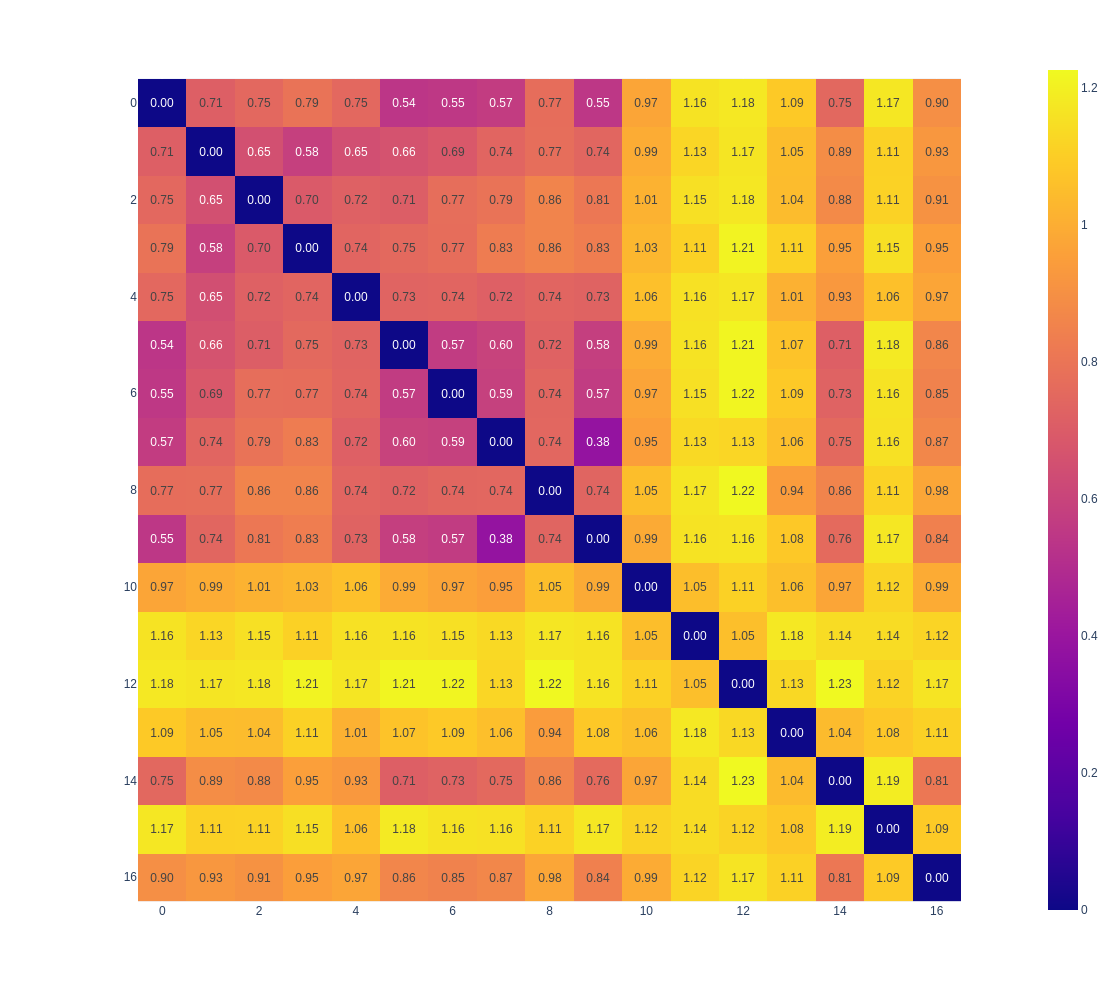

In [49]:
ig.show()